In [1]:
from qgml import get_dst_sol, QGMLgrid, QGMLmodel

import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import pandas as pd
import numpy as np
from diffrax import Euler, Bosh3

from somax._src.models.qg.params import QGParams
from somax._src.models.qg.operators import calculate_potential_vorticity

In [2]:
jax.devices()[0]

CpuDevice(id=0)

In [3]:
# grid settings
resolution = 512
Lx, Ly = 5_120.0e3, 5_120.0e3
grid = QGMLgrid(resolution, Lx, Ly)

/Users/martamrozowska/miniforge3/envs/somax_env/lib/python3.10/site-packages/somax/_src/masks/masks.py:162: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  node = NodeMask(
/Users/martamrozowska/miniforge3/envs/somax_env/lib/python3.10/site-packages/somax/_src/masks/masks.py:171: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  center = CenterMask(
/Users/martamrozowska/miniforge3/envs/somax_env/lib/python3.10/site-packages/somax/_src/masks/masks.py:179: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  u = FaceMask(
/Users/martamrozowska/miniforge3/envs/somax_env/lib/python3.10/site-packages/somax/_src/masks/masks.py:189: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  v = FaceMask(
/Users/martamr

In [4]:
# somax qg model params
params = QGParams(
    f0 = 9.4e-5,
    beta = 1.7e-11,
    tau0 = 5e-5,
    y0 = 0.5 * Ly,
    a_2 = 30.0,
    a_4 = 0.0,
    bcco = 0.2,
    delta_ek = 2.0,
    num_pts = 3,
    method = "arakawa"
)

In [5]:
# initialize PV and stream function fields 
psi0 = jnp.ones(shape=(grid.layer_domain.Nz,) + grid.xy_domain.Nx)
q0 = calculate_potential_vorticity(
    psi0, grid.xy_domain, grid.layer_domain, 
    params=params,
    masks_psi=grid.masks.node, 
    masks_q=grid.masks.center
)

In [6]:
# initial discrete sine transform (DST) spectral solution
dst_sol = get_dst_sol(psi0, grid, params)

/Users/martamrozowska/Desktop/to_committ/qgml.py:82: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  dst_sol = DSTSolution(


In [7]:
# time settings
t0 = 0.0
num_days = 1
t1 = pd.to_timedelta(num_days, unit="days").total_seconds()
dt = 2000.0

In [8]:
# define the qg model
my_model = QGMLmodel(
    psi0 = psi0,
    q0 = q0,
    grid = grid,
    dst_sol = dst_sol,
    f0 = params.f0,
    beta = params.beta,
    tau0 = params.tau0,
    y0 = params.y0,
    a_2 = params.a_2,
    a_4 = params.a_4,
    bcco = params.bcco,
    delta_ek = params.delta_ek,
    num_pts = params.num_pts,
    method = params.method,
    solver = Bosh3(),
    max_steps = int(t1 + 100),
)

In [9]:
# run the model
sol = my_model(t0=t0, t1=t1, dt=dt)
psi, q = sol.ys

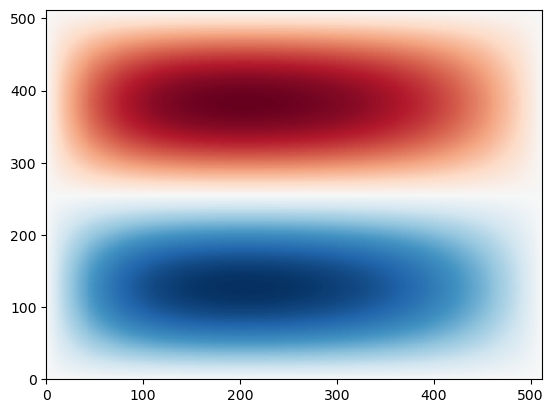

In [ ]:
plt.pcolor(psi[-1, 0].T, cmap="RdBu")

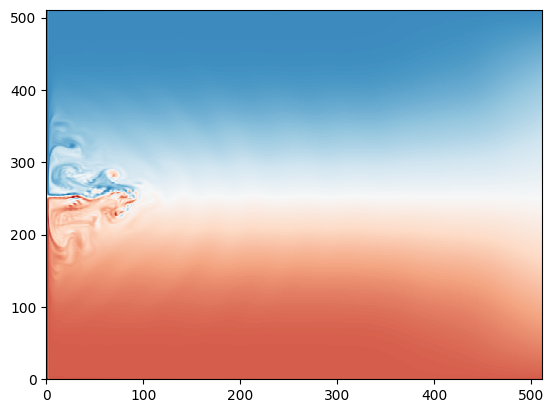

In [17]:
plt.pcolor(q[-1, 0].T, cmap="RdBu")

In [18]:
psi_20yrs = np.load('psi_test_20yr.npy')
q_20yrs = np.load('q_test_20yr.npy')

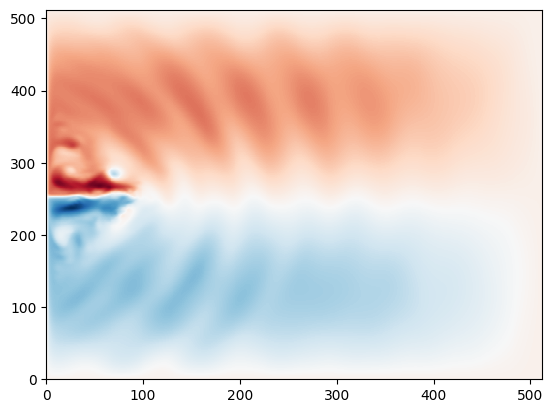

In [19]:
plt.pcolor(psi[-1, 0].T, cmap="RdBu")

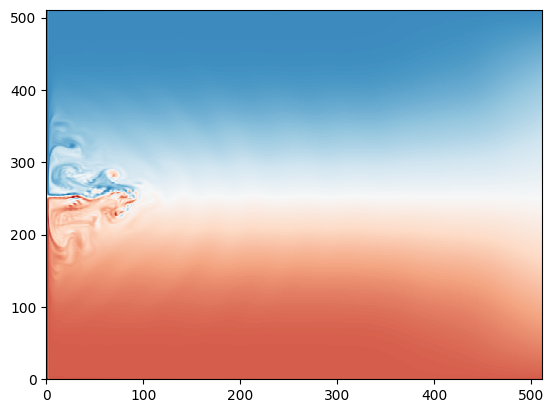

In [20]:
plt.pcolor(q[-1, 0].T, cmap="RdBu")